In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()
#reading the test data nd train data 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
df_train.shape
# getting rows and columns

(10683, 11)

In [44]:
df_train.isnull().sum()
#check the columns having null

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [45]:
df2 = df_train.dropna(axis=0)
df2.isnull().sum()
#Drop all the null rows as we are having 2 rows with null

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [46]:
df_train.dtypes
#except price all are in object - We need to convert the data column from onject to datatime

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [47]:
df2['Date_of_Journey'] = pd.to_datetime(df2['Date_of_Journey'])
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
#converting the date column to datetime datatype in both train a d test data

In [48]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [49]:
#getting all the unique data from the object datatype
obj_columns = df2.loc[:,df2.dtypes=='object'].columns
for col in obj_columns:
    print('Unique Count of',col,len(df2[col].unique()))
    print(col,':',df2[col].unique(),'\n')

Unique Count of Airline 12
Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 

Unique Count of Source 5
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] 

Unique Count of Destination 6
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'] 

Unique Count of Route 128
Route : ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → 

In [50]:
df_train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [51]:
#converting the non-stop value in Total_Stops columsn to - stops, as other data are follwing the same format
df2.loc[df2['Total_Stops'] == 'non-stop','Total_Stops'] = '0 stop'
df2['Total_Stops'] = df2['Total_Stops'].str.split(' ').str[0]
#df2.head()
df_test.loc[df_test['Total_Stops'] == 'non-stop','Total_Stops'] = '0 stop'
df_test['Total_Stops'] = df_test['Total_Stops'].str.split(' ').str[0]
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


In [52]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [53]:
#getting year, month and date from date_of_journey
import datetime
df2['year']=df2['Date_of_Journey'].dt.year
df2['month']=df2['Date_of_Journey'].dt.month
df2['day']=df2['Date_of_Journey'].dt.day
df2.drop(columns=['Date_of_Journey'],inplace=True)
df2.head()

df_test['year']=df_test['Date_of_Journey'].dt.year
df_test['month']=df_test['Date_of_Journey'].dt.month
df_test['day']=df_test['Date_of_Journey'].dt.day
df_test.drop(columns=['Date_of_Journey'],inplace=True)
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,2019,6,24


In [54]:
#splitting  the Arrival time to Arrival hour and minute
df2['Arrival_Time'] = df2['Arrival_Time'].str.split(' ').str[0]
df2['Arrival Hour'] = df2['Arrival_Time'].str.split(':').str[0].astype(int)
df2['Arrival Min'] = df2['Arrival_Time'].str.split(':').str[1].astype(int)
df2.drop(columns='Arrival_Time',inplace=True)
df2.head()

df_test['Arrival_Time'] = df_test['Arrival_Time'].str.split(' ').str[0]
df_test['Arrival Hour'] = df_test['Arrival_Time'].str.split(':').str[0].astype(int)
df_test['Arrival Min'] = df_test['Arrival_Time'].str.split(':').str[1].astype(int)
df_test.drop(columns='Arrival_Time',inplace=True)
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,year,month,day,Arrival Hour,Arrival Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1,No info,2019,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1,No info,2019,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1,In-flight meal not included,2019,5,21,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1,No info,2019,5,21,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,0,No info,2019,6,24,2,45


In [55]:

#splitting  the Departure time to Arrival hour and minute
df2['Dep_Time'] = df2['Dep_Time'].str.split(' ').str[0]
df2['Departure Hour'] = df2['Dep_Time'].str.split(':').str[0].astype(int)
df2['Dep_Time Min'] = df2['Dep_Time'].str.split(':').str[1].astype(int)
df2.drop(columns='Dep_Time',inplace=True)
df2.head()

df_test['Dep_Time'] = df_test['Dep_Time'].str.split(' ').str[0]
df_test['Departure Hour'] = df_test['Dep_Time'].str.split(':').str[0].astype(int)
df_test['Dep_Time Min'] = df_test['Dep_Time'].str.split(':').str[1].astype(int)
df_test.drop(columns='Dep_Time',inplace=True)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,2019,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,2019,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,2019,5,21,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,2019,5,21,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,2019,6,24,2,45,23,55


In [56]:
#we can drop duration , as ae are havinf arrival time and departure time
df2.drop(columns='Duration',inplace=True)
#we can drop duration , as ae are havinf arrival time and departure time
df_test.drop(columns='Duration',inplace=True)

In [57]:
df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,2019,1,3,21,35,16,50


                              Airline     Price
4                         Jet Airways  44817461
1                           Air India  16831361
6                   Multiple carriers  13039603
3                              IndiGo  11648071
10                            Vistara   3734451
8                            SpiceJet   3548717
0                            Air Asia   1783293
2                               GoAir   1137045
5                Jet Airways Business    350152
7   Multiple carriers Premium economy    148445
11            Vistara Premium economy     26887
9                              Trujet      4140


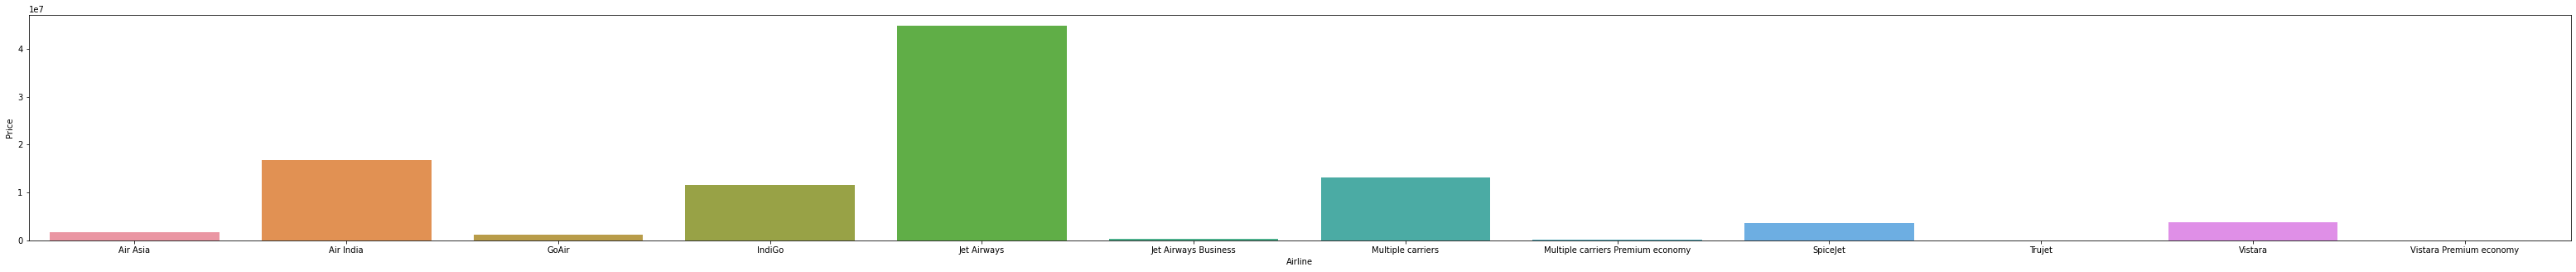

In [58]:
#groupby airline and plot the price.
plt.figure(figsize=(55,5))
df_groupAirline = df2.groupby('Airline').agg({'Price':'sum'}).reset_index()
sns.barplot(x='Airline',y='Price',data=df_groupAirline)
print(df_groupAirline.sort_values(by='Price',ascending=False))

#Jet Airways ar having maxprice

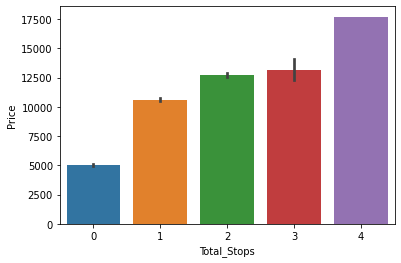

In [59]:
#ploting the impact of no of stops and its price
sns.barplot(x='Total_Stops',y='Price',data=df2)

#Flights having highest stops are higher in price

In [60]:
#getting the max length of data from Route column
df2['Route'].str.len().max()

33

In [61]:
df2[df2['Route'].str.len()>= 33]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,4,Change airports,17686,2019,1,3,11,20,5,50


In [62]:
df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,2019,1,3,21,35,16,50


In [63]:
#converting the route to differnt columns
df2['Route_1'] = df2['Route'].str.split('→ ').str[0]
df2['Route_2'] = df2['Route'].str.split('→ ').str[1]
df2['Route_3'] = df2['Route'].str.split('→ ').str[2]
df2['Route_4'] = df2['Route'].str.split('→ ').str[3]
df2['Route_5'] = df2['Route'].str.split('→ ').str[4]
df2['Route_6'] = df2['Route'].str.split('→ ').str[5]
df2.drop(columns=['Route'],inplace=True)

df_test['Route_1'] = df_test['Route'].str.split('→ ').str[0]
df_test['Route_2'] = df_test['Route'].str.split('→ ').str[1]
df_test['Route_3'] = df_test['Route'].str.split('→ ').str[2]
df_test['Route_4'] = df_test['Route'].str.split('→ ').str[3]
df_test['Route_5'] = df_test['Route'].str.split('→ ').str[4]
df_test['Route_6'] = df_test['Route'].str.split('→ ').str[5]
df_test.drop(columns=['Route'],inplace=True)

In [64]:
df2.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,4,25,9,25,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,23,30,18,5,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,21,35,16,50,BLR,NAG,DEL,NaN,NaN,NaN


In [65]:
df2['Route_1'].fillna("None",inplace=True)
df2['Route_2'].fillna("None",inplace=True)
df2['Route_3'].fillna("None",inplace=True)
df2['Route_4'].fillna("None",inplace=True)
df2['Route_5'].fillna("None",inplace=True)
df2['Route_6'].fillna("None",inplace=True)
df2.head()

df_test['Route_1'].fillna("None",inplace=True)
df_test['Route_2'].fillna("None",inplace=True)
df_test['Route_3'].fillna("None",inplace=True)
df_test['Route_4'].fillna("None",inplace=True)
df_test['Route_5'].fillna("None",inplace=True)
df_test['Route_6'].fillna("None",inplace=True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,Jet Airways,Delhi,Cochin,1,No info,2019,6,6,4,25,17,30,DEL,BOM,COK,None,None,None
1,IndiGo,Kolkata,Banglore,1,No info,2019,12,5,10,20,6,20,CCU,MAA,BLR,None,None,None
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,2019,5,21,19,0,19,15,DEL,BOM,COK,None,None,None
3,Multiple carriers,Delhi,Cochin,1,No info,2019,5,21,21,0,8,0,DEL,BOM,COK,None,None,None
4,Air Asia,Banglore,Delhi,0,No info,2019,6,24,2,45,23,55,BLR,DEL,None,None,None,None


In [66]:
df2['ref'] = 'Train'
df_test['ref'] = 'Test'

In [67]:
df = pd.concat([df2,df_test],axis=0)

In [68]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Airline'] = lbl.fit_transform(df['Airline'])
df['Source'] = lbl.fit_transform(df['Source'])
df['Additional_Info'] = lbl.fit_transform(df['Additional_Info'])
df['Destination'] = lbl.fit_transform(df['Destination'])
df.head()

,Additional_Info,Airline,Arrival Hour,Arrival Min,Dep_Time Min,Departure Hour,Destination,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Source,Total_Stops,day,month,ref,year
0,8,3,1,10,20,22,5,3897.0,BLR,DEL,None,None,None,None,0,0,24,3,Train,2019
1,8,1,13,15,50,5,0,7662.0,CCU,IXR,BBI,BLR,None,None,3,2,5,1,Train,2019
2,8,4,4,25,25,9,1,13882.0,DEL,LKO,BOM,COK,None,None,2,2,6,9,Train,2019
3,8,3,23,30,5,18,0,6218.0,CCU,NAG,BLR,None,None,None,3,1,5,12,Train,2019
4,8,3,21,35,50,16,5,13302.0,BLR,NAG,DEL,None,None,None,0,1,3,1,Train,2019


In [69]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df2['Airline'] = lbl.fit_transform(df2['Airline'])
df2['Source'] = lbl.fit_transform(df2['Source'])
df2['Additional_Info'] = lbl.fit_transform(df2['Additional_Info'])
df2['Destination'] = lbl.fit_transform(df2['Destination'])
df2.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,day,Arrival Hour,Arrival Min,Departure Hour,Dep_Time Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,ref
0,3,0,5,0,8,3897,2019,3,24,1,10,22,20,BLR,DEL,None,None,None,None,Train
1,1,3,0,2,8,7662,2019,1,5,13,15,5,50,CCU,IXR,BBI,BLR,None,None,Train
2,4,2,1,2,8,13882,2019,9,6,4,25,9,25,DEL,LKO,BOM,COK,None,None,Train
3,3,3,0,1,8,6218,2019,12,5,23,30,18,5,CCU,NAG,BLR,None,None,None,Train
4,3,0,5,1,8,13302,2019,1,3,21,35,16,50,BLR,NAG,DEL,None,None,None,Train


In [70]:
df2['Route_1'] = lbl.fit_transform(df2['Route_1'])
df2['Route_2'] = lbl.fit_transform(df2['Route_2'])
df2['Route_3'] = lbl.fit_transform(df2['Route_3'])
df2['Route_4'] = lbl.fit_transform(df2['Route_4'])
df2['Route_5'] = lbl.fit_transform(df2['Route_5'])
df2['Route_6'] = lbl.fit_transform(df2['Route_6'])

df['Route_1'] = lbl.fit_transform(df['Route_1'])
df['Route_2'] = lbl.fit_transform(df['Route_2'])
df['Route_3'] = lbl.fit_transform(df['Route_3'])
df['Route_4'] = lbl.fit_transform(df['Route_4'])
df['Route_5'] = lbl.fit_transform(df['Route_5'])
df['Route_6'] = lbl.fit_transform(df['Route_6'])

In [71]:
df2['year'].unique()

array([2019], dtype=int64)

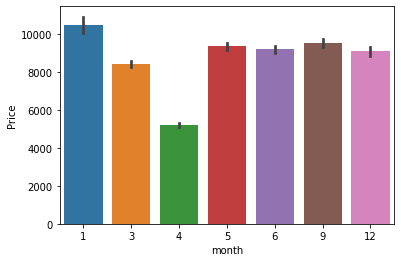

In [72]:
sns.barplot(x='month',y='Price',data=df2)

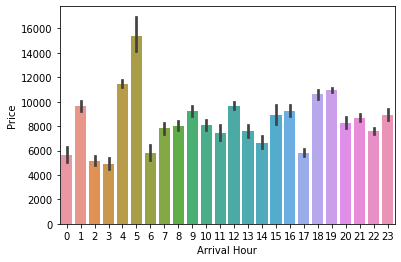

In [73]:
sns.barplot(x='Arrival Hour',y='Price',data=df2)

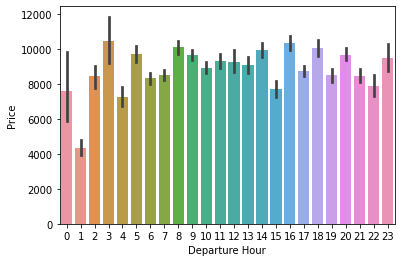

In [74]:
sns.barplot(x='Departure Hour',y='Price',data=df2)

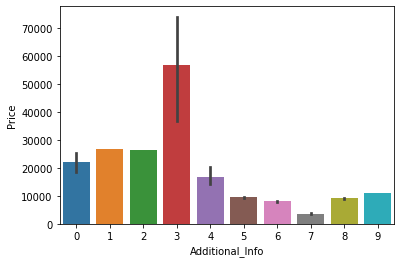

In [75]:
sns.barplot(x='Additional_Info',y='Price',data=df2)

In [76]:
X=df2.drop(columns=['Price','ref'])
y=df2['Price']

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
def getscore_metrics(prediction,actual):
    print("mean_squared_error:",mean_squared_error(prediction,actual))
    print("mean_absolute_error:",mean_absolute_error(prediction,actual))
    print("mean_squared_log_error:",mean_squared_log_error(prediction,actual))
    print("r2_score:",r2_score(prediction,actual))

In [79]:
def parsemodel(model,X,y,X_test,y_test):
    model.fit(X,y)
    pred = model.predict(X_test)
    model.score(X_test,y_test)
    getscore_metrics(pred,y_test)

In [80]:
from sklearn.linear_model import LinearRegression
print("cross_val_score:",cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y)
parsemodel(LinearRegression(),X_train,y_train,X_test,y_test)

cross_val_score: 0.4771358764222759
mean_squared_error: 9650506.80998666
mean_absolute_error: 2257.382848188256
mean_squared_log_error: 0.1115995912452569
r2_score: 0.0897287296707786


In [81]:
from sklearn.linear_model import RidgeCV
print("cross_val_score:",cross_val_score(RidgeCV(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y)
parsemodel(RidgeCV(),X_train,y_train,X_test,y_test)

cross_val_score: 0.4771171087107982
mean_squared_error: 9646841.394011071
mean_absolute_error: 2256.816220113258
mean_squared_log_error: 0.11156033754335497
r2_score: 0.087693252148485


In [82]:
from sklearn.linear_model import LassoCV
print("cross_val_score:",cross_val_score(LassoCV(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y)
parsemodel(LassoCV(),X_train,y_train,X_test,y_test)

cross_val_score: 0.4761259438402286
mean_squared_error: 9633861.316203278
mean_absolute_error: 2254.5875413710946
mean_squared_log_error: 0.11110279021207117
r2_score: 0.06731488536674413


In [83]:
from sklearn.linear_model import ElasticNet
print("cross_val_score:",cross_val_score(ElasticNet(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y)
parsemodel(ElasticNet(),X_train,y_train,X_test,y_test)

cross_val_score: 0.456479456231067
mean_squared_error: 9842631.70135396
mean_absolute_error: 2276.3029341897686
mean_squared_log_error: 0.11188136439106379
r2_score: -0.027482351733470578


In [84]:
from sklearn.svm import SVC
print("cross_val_score:",cross_val_score(SVC(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(SVC(),X_train,y_train,X_test,y_test)

cross_val_score: 0.02389605268808389
mean_squared_error: 21667448.304594442
mean_absolute_error: 3821.0555870674984
mean_squared_log_error: 0.3349151568456656
r2_score: 0.0


In [85]:
from sklearn.neighbors import KNeighborsRegressor
print("cross_val_score:",cross_val_score(KNeighborsRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(KNeighborsRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: 0.6015563438114194
mean_squared_error: 7331436.504787293
mean_absolute_error: 1695.131310266591
mean_squared_log_error: 0.06588579709522951
r2_score: 0.5242554815052126


In [86]:
from sklearn.tree import DecisionTreeRegressor
print("cross_val_score:",cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(DecisionTreeRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: 0.7669423984455896
mean_squared_error: 2836845.406488309
mean_absolute_error: 658.1368878805067
mean_squared_log_error: 0.022977952409408177
r2_score: 0.855739730110933


In [87]:
from sklearn.ensemble import RandomForestRegressor
print("cross_val_score:",cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(RandomForestRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: 0.8657279177028944
mean_squared_error: 2034436.0069956793
mean_absolute_error: 629.4533949515617
mean_squared_log_error: 0.01613271580218378
r2_score: 0.8914034675777892


In [88]:
from sklearn.ensemble import AdaBoostRegressor
print("cross_val_score:",cross_val_score(AdaBoostRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(AdaBoostRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: 0.2910726542004746
mean_squared_error: 11836511.044711037
mean_absolute_error: 2769.875044909467
mean_squared_log_error: 0.18258085239215321
r2_score: -0.007113475097206834


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
print("cross_val_score:",cross_val_score(GradientBoostingRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(GradientBoostingRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: 0.8191532636287912
mean_squared_error: 3089633.406886757
mean_absolute_error: 1216.592294713737
mean_squared_log_error: 0.035691649429916754
r2_score: 0.8104944144151347


In [90]:
df_test = df[df['ref'] == 'Test'].drop(columns='Price')
df_test.dropna(inplace=True)

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
#Random Forest is performing well compared to other model

RandomForestRegressor()

In [92]:
df_test

,Additional_Info,Airline,Arrival Hour,Arrival Min,Dep_Time Min,Departure Hour,Destination,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Source,Total_Stops,day,month,ref,year
0,8,4,4,25,30,17,1,3,7,6,12,4,1,2,1,6,6,Test,2019
1,8,3,10,20,20,6,0,2,33,3,12,4,1,3,1,5,12,Test,2019
2,5,4,19,0,15,19,1,3,7,6,12,4,1,2,1,21,5,Test,2019
3,8,6,21,0,0,8,1,3,7,6,12,4,1,2,1,21,5,Test,2019
4,8,0,2,45,55,23,2,0,13,24,12,4,1,0,0,24,6,Test,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,8,1,20,25,30,20,0,2,14,3,12,4,1,3,1,6,6,Test,2019
2667,8,3,16,55,20,14,0,2,5,24,12,4,1,3,0,27,3,Test,2019
2668,8,4,4,25,50,21,1,3,7,6,12,4,1,2,1,3,6,Test,2019
2669,8,1,19,15,0,4,1,3,7,6,12,4,1,2,1,3,6,Test,2019


In [93]:
df_test['Price'] = model.predict(df_test.drop(columns='ref'))

In [94]:
df_test.to_csv('FlightPrice_Predcition.csv')